<a href="https://colab.research.google.com/github/riteshgupta7355/Time-Series/blob/main/Time_Series_Forecasting_with_Facebook_Prophet_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting with Facebook Prophet 

## Install and Import Dependencies


In [17]:
# !pip install pystan
# !pip install fbprophet

In [18]:
import pandas as pd
from fbprophet import Prophet
import warnings; 
warnings.simplefilter('ignore')

In [19]:
df = pd.read_csv('dataset.csv')
df.head()


,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [20]:
df.dtypes

Time Date      int64
Product        int64
Store         object
Value        float64
dtype: object

In [21]:
df.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


In [22]:
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

In [23]:
df = df.loc[(df['Product']==2667437) & (df['Store']=='QLD_CW_ST0203')]
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']


In [24]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


## Train Model

In [25]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

## Forecast Away

In [27]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3041.650969,752.070202,4105.454310,3041.650969,3041.650969,-640.901196,-640.901196,-640.901196,468.456246,468.456246,468.456246,16.659618,16.659618,16.659618,-1126.017060,-1126.017060,-1126.017060,0.0,0.0,0.0,2400.749773
1,2018-01-02,3042.411286,859.727666,4063.335201,3042.411286,3042.411286,-651.011594,-651.011594,-651.011594,468.456246,468.456246,468.456246,-11.261861,-11.261861,-11.261861,-1108.205979,-1108.205979,-1108.205979,0.0,0.0,0.0,2391.399692
2,2018-01-03,3043.171603,946.660969,3963.052342,3043.171603,3043.171603,-625.159988,-625.159988,-625.159988,468.456246,468.456246,468.456246,-4.408938,-4.408938,-4.408938,-1089.207297,-1089.207297,-1089.207297,0.0,0.0,0.0,2418.011616
3,2018-01-04,3043.931921,911.724089,4074.566713,3043.931921,3043.931921,-578.115568,-578.115568,-578.115568,468.456246,468.456246,468.456246,22.525682,22.525682,22.525682,-1069.097497,-1069.097497,-1069.097497,0.0,0.0,0.0,2465.816352
4,2018-01-05,3044.692238,1010.061437,3978.312018,3044.692238,3044.692238,-614.107141,-614.107141,-614.107141,468.456246,468.456246,468.456246,-34.557511,-34.557511,-34.557511,-1048.005877,-1048.005877,-1048.005877,0.0,0.0,0.0,2430.585097


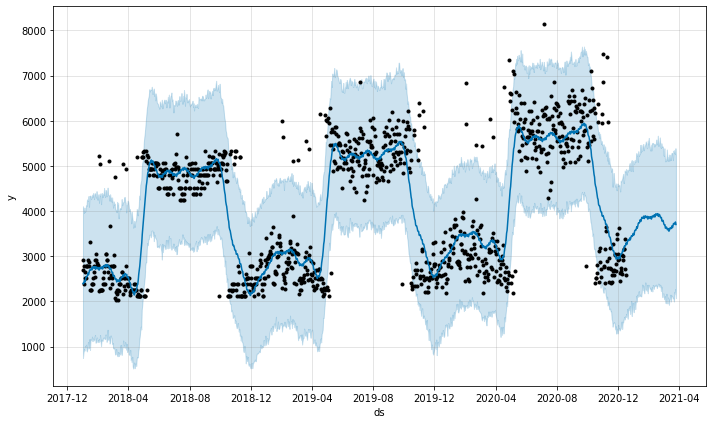

In [28]:
plot1 = m.plot(forecast)


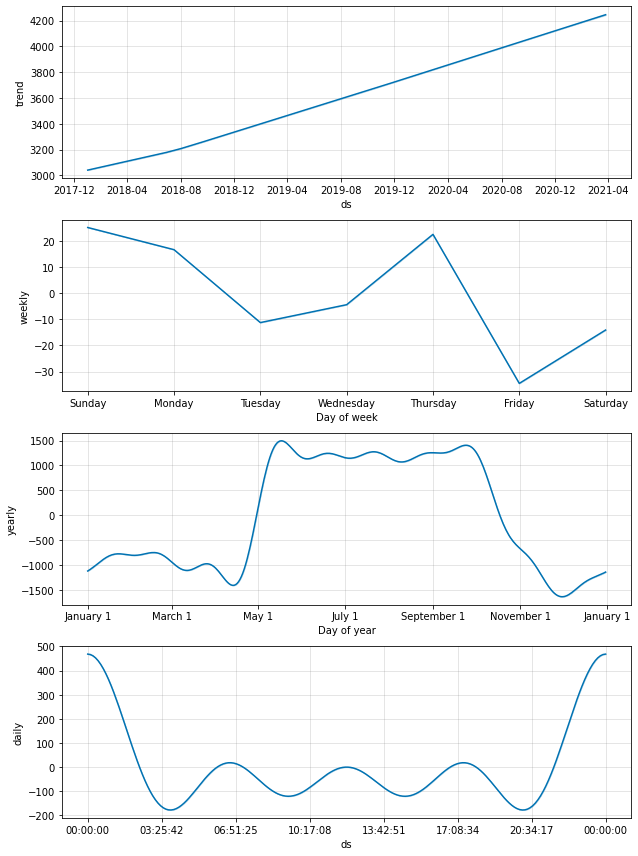

In [29]:
plt2 = m.plot_components(forecast)
